In [ ]:
#Running window analysis 

In [19]:
#imports
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import seaborn as sns
#from dataClasses import Trial,Neuron
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn.model_selection import cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report
#import intertools 
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from imblearn.pipeline import  Pipeline

from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import boto3
import json
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy import stats
import numpy as np
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

In [22]:
# Load results from both sessions
results_PPCs1 = pd.read_csv("results_window_PPC_S1.csv")
results_naive = pd.read_csv("results_window_s1naive.csv")

# Check the structure and contents of the DataFrames
print(results_PPCs1.head())
print(results_naive.head())

  Brain Area  Window Size  Window Start           Neuron  \
0        PPC            1             0  [5.8820181e+11]   
1        PPC            1             0  [5.8820181e+11]   
2        PPC            1             0  [5.8820181e+11]   
3        PPC            1             0  [5.8820181e+11]   
4        PPC            1             0  [5.8820181e+11]   

                                      Train Accuracy  Test Accuracy  p value  
0  [51.90217391304348, 52.98913043478261, 51.3586...      46.875000    0.768  
1  [51.90217391304348, 50.54347826086956, 51.9021...      47.916667    0.711  
2  [52.44565217391305, 52.17391304347826, 52.4456...      46.875000    0.778  
3  [51.630434782608695, 49.18478260869565, 50.543...      45.833333    0.781  
4  [50.416666666666664, 44.166666666666664, 45.41...      41.666667    0.912  
  Brain Area  Window Size  Window Start            Neuron  \
0          S            1             0  [1.21820191e+12]   
1          S            1             0  [1

In [23]:
results_naive["Brain Area"] = results_naive["Brain Area"].replace("S", "S1naive")

# Verify the changes
print(results_naive["Brain Area"].unique())

['S1naive']


In [29]:
results_combined.to_csv("results_window_all.csv", index=False)


In [28]:
# Combine the DataFrames
results_combined = pd.concat([results_naive, results_PPCs1], ignore_index=True)

# Check the combined DataFrame
print(results_combined.shape)
print(results_combined.head())

(28645, 7)
  Brain Area  Window Size  Window Start            Neuron  \
0    S1naive            1             0  [1.21820191e+12]   
1    S1naive            1             0  [1.21820191e+12]   
2    S1naive            1             0  [1.21820191e+12]   
3    S1naive            1             0  [1.21820191e+12]   
4    S1naive            1             0  [1.26020191e+12]   

                                      Train Accuracy  Test Accuracy  p value  
0  [51.041666666666664, 52.083333333333336, 52.08...      54.166667    0.269  
1  [48.75, 50.833333333333336, 50.416666666666664...      48.437500    0.656  
2  [51.666666666666664, 50.833333333333336, 46.25...      53.125000    0.369  
3  [45.833333333333336, 51.25, 52.5, 52.083333333...      53.125000    0.342  
4  [50.520833333333336, 49.479166666666664, 46.87...      50.000000    0.569  


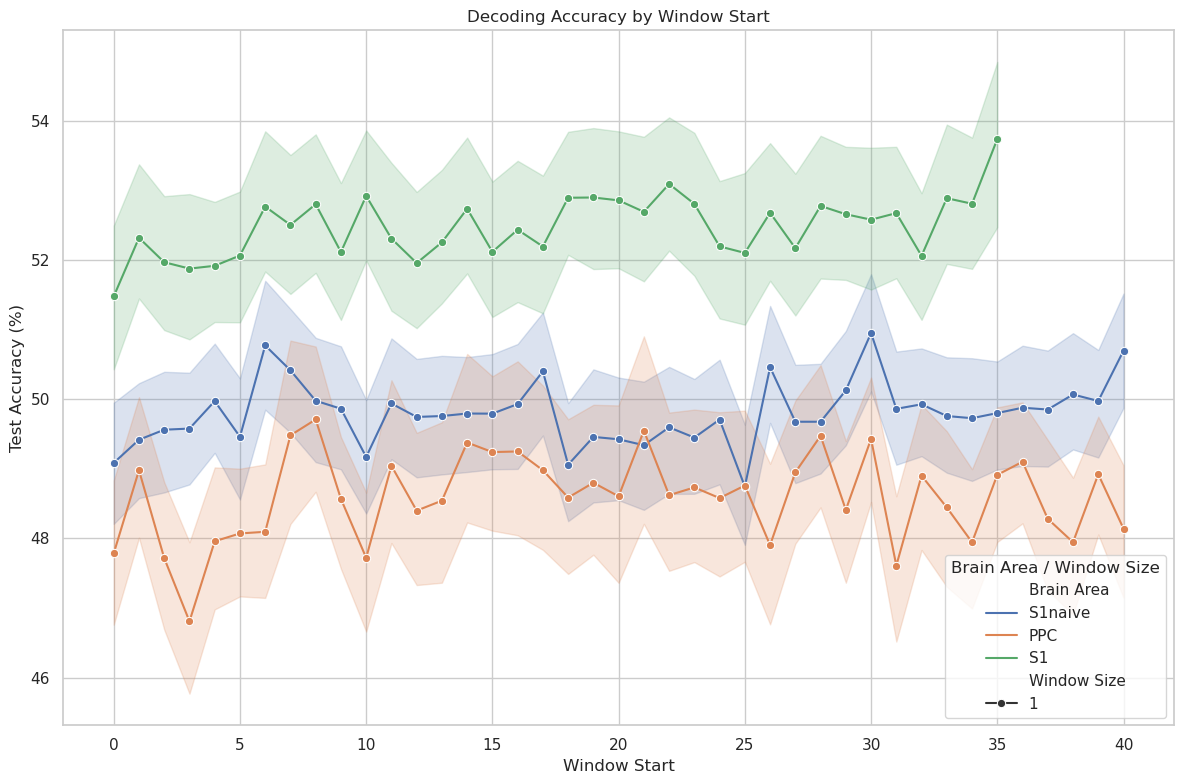

In [30]:
# Set seaborn style for better visualization
sns.set(style="whitegrid")

# Plot Test Accuracy vs. Window Start for each Brain Area and Window Size
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=results_combined,
    x="Window Start",
    y="Test Accuracy",
    hue="Brain Area",
    style="Window Size",
    markers=True,
    dashes=False,
)

plt.title("Decoding Accuracy by Window Start")
plt.xlabel("Window Start")
plt.ylabel("Test Accuracy (%)")
plt.legend(title="Brain Area / Window Size")
plt.tight_layout()

# Save the plot or display it
plt.savefig("combined_results_plot.png")
plt.show()

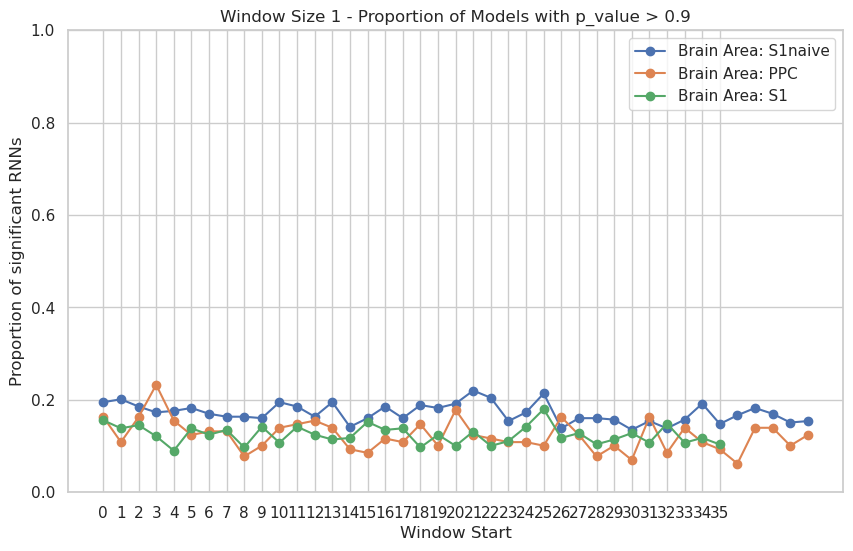

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
results_df=results_combined
# Define unique brain areas and assign colors
unique_brain_areas = results_df['Brain Area'].unique()
brain_area_colors = {area: color for area, color in zip(unique_brain_areas, ['red', 'blue', 'green'])}

# Unique window sizes
window_sizes = results_df['Window Size'].unique()

# Plot for each window size
for size in window_sizes:
    # Filter data for the current window size
    window_df = results_df[results_df['Window Size'] == size]
    
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    for brain_area in unique_brain_areas:
        # Filter for the current brain area
        area_df = window_df[window_df['Brain Area'] == brain_area]

        # Group by 'Window Start' and calculate the proportion of p_value > 0.9
        proportions = area_df.groupby('Window Start')['p value'].apply(lambda x: (x > 0.9).mean())
    
        # Plot
        plt.plot(proportions.index, proportions.values, marker='o', label=f'Brain Area: {brain_area}')
    plt.title(f'Window Size {size} - Proportion of Models with p_value > 0.9')
    plt.xlabel('Window Start')
    plt.ylabel('Proportion of significant RNNs')
    plt.xticks(proportions.index)  # Ensure all window starts are labeled
    plt.ylim(0, 1)  # Proportions are between 0 and 1
    plt.grid(True)
    plt.legend()
    plt.show()
    
    
    plt.savefig(f'proportion_plot_size_{size}.png', dpi=300)




In [ ]:
## Visualising them as popotion of significant performances: 

# Convert results to a DataFrame for easier manipulation
df = pd.DataFrame(results_window)

# Ensure columns are correctly interpreted
df['Window Size'] = df['Window Size'].astype(int)
df['Window Start'] = df['Window Start'].astype(int)
df['p value'] = df['p value'].astype(float)

# Get unique window sizes
window_sizes = df['Window Size'].unique()

# Create a plot for each window size
for size in window_sizes:
    # Filter data for the current window size
    window_data = df[df['Window Size'] == size]
    
    # Group by 'Window Start' and calculate the proportion of p_value > 0.9
    proportions = window_data.groupby('Window Start')['p value'].apply(lambda x: (x > 0.9).mean())
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(proportions.index, proportions.values, marker='o', label=f'Size {size}')
    plt.title(f'Window Size {size} - Proportion of Models with p_value > 0.9')
    plt.xlabel('Window Start')
    plt.ylabel('Proportion')
    plt.xticks(proportions.index)  # Ensure all window starts are labeled
    plt.ylim(0, 1)  # Proportions are between 0 and 1
    plt.grid(True)
    plt.legend()
    plt.show()


    plt.savefig(f'proportion_plot_size_{size}.png', dpi=300)



In [4]:
results_window = pd.read_csv('results_window_oneframe.csv')  # or pd.read_pickle('results_window.pkl')


In [ ]:
#First we rearrange the data to have all the neurons for one session in one dataframe (num_trials, num_time_steps, num_neurons)
def get_pop_data_ready(brain_area, type_of_analysis):
    all_trials=np.load("processed_data/"+brain_area + "_all_trials.npy",allow_pickle=True)
    trial_list=np.empty((all_trials.shape[0],4))
    trial_dff=np.empty((all_trials.shape[0],41)) 
    trial_licks=np.empty((all_trials.shape[0],41))
    
    for trial in range(all_trials.shape[0]):
        
        if type_of_analysis=="GO":
            # for labelling go nogo
            if (all_trials[trial].trial_type)=="go":
                all_trials[trial].trial_id=1
            elif (all_trials[trial].trial_type)=="nogo":
                all_trials[trial].trial_id=0
            else:
                print("gone wrong on neuron ",all_trials[trial].neuron_num )
        elif type_of_analysis=="LICK":
            #for labelling lick nolick
            if (all_trials[trial].trial_outcome)=="FA":
                all_trials[trial].trial_id=1
            elif (all_trials[trial].trial_outcome)=="Hit":
                all_trials[trial].trial_id=1
            elif (all_trials[trial].trial_outcome)=="Miss":
                all_trials[trial].trial_id=0
            elif (all_trials[trial].trial_outcome)=="CR":
                all_trials[trial].trial_id=0
            else:
                print("gone wrong on neuron ",all_trials[trial].neuron_num)
        else:
            print("Type of analysis can only be 'GO' or 'LICK'")
    
        if (all_trials[trial].trial_outcome)=="FA" or (all_trials[trial].trial_outcome)=="Hit":
            trial_dff[trial,0:41]=all_trials[trial].dff 
            #rebase  dff 
            trial_licks[trial,:]=all_trials[trial].licks
            lick_start=np.argmax(trial_licks[trial,:]==1,axis=0)
            trial_dff_rel_licks=np.zeros(trial_licks.shape[1])
            new_start=lick_start-4
            if new_start>=0:                    
                # move the array of licks left so that timeseries starst at lick time
                trial_dff_rel_licks[0:trial_licks.shape[1]-new_start]=all_trials[trial].dff[new_start: ]
                ## need to mske the last few timesteps on the new series = final timestep on original series
                trial_dff_rel_licks[trial_licks.shape[1]-new_start :]=all_trials[trial].dff[-1]
            else: 
                # move the array of licks right so that timeseries starst at lick time
                trial_dff_rel_licks[0-new_start :]=all_trials[trial].dff[0:all_trials[trial].dff.shape[0]+new_start]
                ## need to mske the first few timesteps on the new series = first timestep on original series
                trial_dff_rel_licks[0:-new_start]=all_trials[trial].dff[ 0 ]
                #trial_dff[trial,41:82]=trial_dff_rel_licks
        else:
            trial_dff[trial,0:41]=all_trials[trial].dff 
            #trial_dff[trial,41:82]=all_trials[trial].dff
    return all_trials, trial_dff

In [ ]:
### Group session for population level analysis 

# Initialize parameters
num_permutations = 1000
results_window = []

# Brain areas and analysis type
brain_areas = ["PPC", "S1", "S1naive"]
type_of_analysis = "GO"

for brain in brain_areas:
    # Get data for the brain area
    trial_list, trial_dff = get_data_ready(brain, type_of_analysis)
    print(f"Brain Area: {brain}, Data Shape: {trial_dff.shape}")
    
    # Specify the variables of interest
    variables_of_interest = ['trial_id', 'mouse_id', 'date', 'num_trial']
        
    # Create DataFrame with only the variables of interest
    trials_data = [
        {key: getattr(trial, key) for key in variables_of_interest} 
           for trial in trial_list
    ]
        
    # Create DataFrame from the extracted data
    trial_df = pd.DataFrame(trials_data)
        
        # Group by unique trial identifiers: mouse_id, date, trial_num
    grouped_trials = trial_df.groupby(['mouse_id', 'date', 'num_trial'])
        
    ### work with grouped trials
    
    
    # Create session-level data structure
    session_data = []
    for session_id, group in grouped_trials:
        session_data.append({
            "session_id": session_id,                           # Unique session identifier (e.g., label)
            "session_trials": group['trial_id'].values,         # Trial IDs
            "session_dff": np.stack(group['dff'].values),       # Stack neuronal data into a 3D array
            "session_labels": group['label'].values            # Labels for each trial
   
    # Group all neurons in the session
    
    # Window sizes to test
    size_of_window = [1, 2, 4]
    
    for size in size_of_window:
        window_start = np.arange(0, 41, size)  # Start positions
        
        for start in window_start:
            print(f"Window Size: {size}, Start: {start}")
            
            # Extract data for the current window
            X_window = X[:, start:start + size]  # Window of data
            
            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X_window, y, test_size=0.2, random_state=42)

            # Apply PCA
            n_components = min(size, 5)  # Reduce dimensionality
            pca = PCA(n_components=n_components)
            X_train_pca = pca.fit_transform(X_train)
            X_test_pca = pca.transform(X_test)
            
            # Prepare tensors for PyTorch
            Xtrain = torch.tensor(X_train_pca).float()
            ytrain = torch.tensor(y_train).long()
            Xtest = torch.tensor(X_test_pca).float()
            ytest = torch.tensor(y_test).long()
            
            # Create DataLoaders
            batch_size = 16
            train_loader = DataLoader(TensorDataset(Xtrain, ytrain), batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(TensorDataset(Xtest, ytest), batch_size=batch_size, shuffle=False)
            
            # Define RNN model
            input_dim = X_train_pca.shape[1]
            hidden_dim = 4
            layer_dim = 1
            output_dim = 1
            model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

            # Define optimizer and loss function
            optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
            loss_fn = nn.BCEWithLogitsLoss()
            
            # Training loop
            num_epochs = 100
            for epoch in range(num_epochs):
                model.train()
                for X_batch, y_batch in train_loader:
                    optimizer.zero_grad()
                    outputs = model(X_batch).squeeze()
                    loss = loss_fn(outputs, y_batch.float())
                    loss.backward()
                    optimizer.step()
                scheduler.step()
            
            # Evaluate model
            model.eval()
            with torch.no_grad():
                outputs = model(Xtest).squeeze()
                probabilities = torch.sigmoid(outputs)
                predictions = (probabilities > 0.5).long()
                test_accuracy = 100 * (predictions == ytest).sum().item() / len(ytest)
            
            # Permutation test for p-value
            class_distribution = np.mean(y_test)
            random_accuracies = []
            for _ in range(num_permutations):
                y_random = np.random.choice([0, 1], size=len(y_test), p=[1 - class_distribution, class_distribution])
                random_accuracy = accuracy_score(y_test, y_random)
                random_accuracies.append(random_accuracy)

            p_value = np.mean(np.array(random_accuracies) >= test_accuracy / 100)

            # Store results
            results_window.append({
                'Brain Area': brain,
                'Window Size': size,
                'Window Start': start,
                'Test Accuracy': test_accuracy,
                'p value': p_value
            })
            print(f"Brain: {brain}, Window: {size}, Start: {start}, Accuracy: {test_accuracy:.2f}, p-value: {p_value:.4f}")


In [ ]:
# Load data
brain_area = "PPC"
analysis_type = "GO"
trial_list, trial_dff = get_pop_data_ready(brain_area, analysis_type)

# Specify the variables of interest
variables_of_interest = ['trial_id', 'mouse_id', 'date', 'num_trial']
    
# Create DataFrame with only the variables of interest
trials_data = [
    {key: getattr(trial, key) for key in variables_of_interest} 
       for trial in trial_list
]
    
# Create DataFrame from the extracted data
trial_df = pd.DataFrame(trials_data)
    
    # Group by unique trial identifiers: mouse_id, date, trial_num
grouped_trials = trial_df.groupby(['mouse_id', 'date', 'num_trial'])
    
### work with grouped trials


# Create session-level data structure
session_data = []
for session_id, group in grouped_trials:
    session_data.append({
        "session_id": session_id,                           # Unique session identifier (e.g., label)
        "session_trials": group['trial_id'].values,         # Trial IDs
        "session_dff": np.stack(group['dff'].values),       # Stack neuronal data into a 3D array
        "session_labels": group['label'].values            # Labels for each trial
    })

# Iterate over sessions to prepare data for modeling
for session in session_data:
    session_id = session["session_id"]
    session_dff = session["session_dff"]
    session_labels = session["session_labels"]

    print(f"Processing Session ID: {session_id}")

    # Define window parameters
    size_of_window = [1,2,4]
    for size in size_of_window:
        window_start = np.arange(0, session_dff.shape[1] - size + 1, size)

        for start in window_start:
            # Extract window-specific data
            window_dff = session_dff[:, start:start + size]
            
            # Prepare X (features) and y (labels)
            X = window_dff.copy()
            y = session_labels.copy()

            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Apply PCA to reduce to min(size, 5) components
            n_components = min(size, 5)
            pcaTrain = PCA(n_components=n_components)
            pcaTest = PCA(n_components=n_components)

            X_train_pca = pcaTrain.fit_transform(X_train)
            X_test_pca = pcaTest.fit_transform(X_test)

            # Reshape PCA output to 3D for RNN input
            X_train_pca = X_train_pca.reshape(X_train_pca.shape[0], n_components, 1)
            X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], n_components, 1)

            print(f"Window Start: {start}, Window Size: {size}")
            print(f"X_train shape: {X_train_pca.shape}, X_test shape: {X_test_pca.shape}")

                
            # Reshape PCA output to 3D for RNN input
            # New shape: (num_samples,num_components,1)
            num_components = X_train_pca.shape[1]
            X_train_pca = X_train_pca.reshape(X_train_pca.shape[0], num_components, 1)
            X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], num_components, 1)


            # Convert to PyTorch tensors
            Xtrain = torch.from_numpy(X_train_pca).float()
            ytrain = torch.from_numpy(y_train).long()
            Xtest = torch.from_numpy(X_test_pca).float()
            ytest = torch.from_numpy(y_test).long()
    
            # Batch size, epochs, and iterations
            batch_size = 16
            n_iters = 1000
            num_epochs = int(n_iters // (len(X_train) // batch_size))
    
            train = TensorDataset(Xtrain, ytrain)
            test = TensorDataset(Xtest, ytest)
    
            train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=True)
            test_loader = DataLoader(test, batch_size=batch_size, shuffle=True, drop_last=True)
    
            # Create the RNN model
            input_dim = X_train_pca.shape[-1]
            hidden_dim = 4
            layer_dim = 1
            output_dim = 1
    
            model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)
    
            # Loss function and optimizer
            error = nn.BCEWithLogitsLoss()  # No class weights, since oversampling handles imbalance
            learning_rate = 0.01
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
            scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
    
            # Training loop for the original model
            train_accuracy_list = []
            test_accuracy_list = []
            test_loss_list = []
    
            for epoch in range(num_epochs):
                model.train()
                total_train, correct_train = 0, 0
    
                for X_batch, y_batch in train_loader:
                    optimizer.zero_grad()
                    outputs = model(X_batch).squeeze()
                    loss = error(outputs, y_batch.float())
                    loss.backward()
                    optimizer.step()
    
                    probabilities = torch.sigmoid(outputs)
                    predicted = (probabilities > 0.5).long()
                    correct_train += (predicted.squeeze() == y_batch).sum().item()
                    total_train += y_batch.size(0)
    
                train_accuracy = 100 * correct_train / total_train
                train_accuracy_list.append(train_accuracy)
                scheduler.step()
    
                # Evaluate on test set
                model.eval()
                total_test, correct_test = 0, 0
                with torch.no_grad():
                    for X_test_batch, y_test_batch in test_loader:
                        outputs = model(X_test_batch).squeeze()
                        probabilities = torch.sigmoid(outputs)
                        predicted = (probabilities > 0.5).long()
                        correct_test += (predicted == y_test_batch).sum().item()
                        total_test += y_test_batch.size(0)
                        loss_test = error(outputs, y_test_batch.float())
                        test_loss_list.append(loss_test)
    
                test_accuracy = 100 * correct_test / float(total_test)
                test_accuracy_list.append(test_accuracy)
    
            # Save the original model's test accuracy
            original_test_accuracy = test_accuracy
    
            # Random classifier: Match class distribution in the test set
            class_distribution = np.mean(y_test)  # proportion of class 1
    
            random_accuracies = []
            for _ in range(num_permutations):
                y_random = np.random.choice([0, 1], size=len(y_test), p=[1 - class_distribution, class_distribution])
                random_accuracy = accuracy_score(y_test, y_random)
                random_accuracies.append(random_accuracy)
    
            # Calculate p-value using a t-test (testing original model vs. random classifiers)
            random_accuracies = np.array(random_accuracies)
            p_value = np.mean(random_accuracies >= original_test_accuracy/100)
    
            # Store results
            results_window.append({
                'Brain Area': brain_area,
                'Window Size': size,
                'Window Start':start,
                'Neuron': neuron,
                'Train Accuracy': train_accuracy_list,
                'Test Accuracy': original_test_accuracy,
                'p value': p_value
            })
    
            print(f"Neuron {neuron}: Test Accuracy = {original_test_accuracy:.2f}%, p-value = {p_value:.4f}")
    
            # Visualize random classifier accuracy distribution
            plt.hist(random_accuracies, bins=20, color='blue', edgecolor='black')
            plt.axvline(original_test_accuracy/100, color='red', linestyle='dashed', linewidth=2)
            plt.title(f'Random Classifier Accuracy Distribution for Neuron {neuron}')
            plt.xlabel('Accuracy')
            plt.ylabel('Frequency')
            plt.show()
    
    
         # Plot training vs test accuracy to examine potential overfitting or bias
            plt.plot(train_accuracy_list, label='Training Accuracy')
            plt.plot(test_accuracy_list, label='Test Accuracy')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy (%)')
            plt.title('Training vs Test Accuracy')
            plt.legend()
            plt.show()
            
            # Check class-specific accuracy on the test set
            
            # Predict on the test set and calculate confusion matrix
            model.eval()
            with torch.no_grad():
                outputs = model(Xtest).squeeze()
                probabilities = torch.sigmoid(outputs)
                predictions = (probabilities > 0.5).long()
                
            conf_matrix = confusion_matrix(ytest, predictions)
            print("Confusion Matrix:\n", conf_matrix)
            
            # Calculate class-specific accuracy
            class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
            print("Class-specific Accuracy:", class_accuracy)